In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoderimport pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

SyntaxError: invalid syntax (Temp/ipykernel_11896/2824115869.py, line 6)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline
from sklearn.preprocessing import LabelEncoderimport pandas as pd

SyntaxError: invalid syntax (Temp/ipykernel_11896/2816318063.py, line 2)

In [4]:
import types
import pandas as pd
liver_df1= pd.read_csv('D:\Projects\Final_Project\liver_patient.csv')
liver_df1.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
#Counting the ocurrence of values of Dataset column
df1['Dataset'].value_counts()

NameError: name 'df1' is not defined

In [6]:
#Counting the ocurrence of values of Dataset 
liver_df1['Dataset'].value_counts()

1    416
2    167
Name: Dataset, dtype: int64

In [7]:
#Converting the Binary value of the Dataset column i.e 1 and 2
#to 0 and 1 as our ANN model got confused and the loss function become negative
dataset.loc[liver_df1['Dataset']==1,'Dataset']=0
dataset.loc[liver_df1['Dataset']==2,'Dataset']=1
dataset['Dataset'].value_counts()

NameError: name 'dataset' is not defined

In [8]:
#Converting the Binary value of the Dataset column i.e 1 and 2
#to 0 and 1 as our ANN model got confused and the loss function become negative
liver_df1.loc[liver_df1['Dataset']==1,'Dataset']=0
liver_df1.loc[liver_df1['Dataset']==2,'Dataset']=1
liver_df1['Dataset'].value_counts()

0    416
1    167
Name: Dataset, dtype: int64

In [9]:
#For visualising
import seaborn as sns

In [10]:
#Dividing the data into training and test set
from sklearn.model_selection import train_test_split

In [11]:
new_Data=pd.get_dummies(liver_df1,columns=['Gender'],drop_first=True)

In [12]:
def Converter(data):
    if pd.isnull(data):
        return new_Data['Albumin_and_Globulin_Ratio'].mean()
    else:
        return data 
        

In [13]:
#Applying the Function to column of the dataset that have null values
new_Data['Albumin_and_Globulin_Ratio']=new_Data['Albumin_and_Globulin_Ratio'].apply(Converter)

<AxesSubplot:>

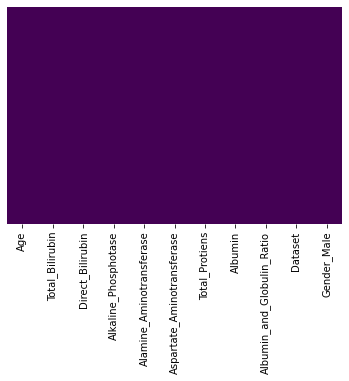

In [14]:
#Rechecking for null value
sns.heatmap(new_Data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
#Converting the dataset into x and y(target variable)
X=new_Data.drop('Dataset',axis=1)
y=new_Data['Dataset']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler=StandardScaler()

In [19]:
X_train=scaler.fit_transform(X_train)

In [20]:
X_test=scaler.transform(X_test)

In [21]:
import keras

In [22]:
#importing the libraries for our ANN Model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [23]:
#Initialising the model
model=Sequential()

In [24]:
#adding the first layer
model.add(Dense(units=6,kernel_initializer='uniform',activation='relu',input_dim=10))
model.add(Dropout(2))

ValueError: Invalid value 2 received for `rate`, expected a value between 0 and 1.

In [25]:
#adding the first layer
model.add(Dense(units=6,kernel_initializer='uniform',activation='relu',input_dim=10))
model.add(Dropout(1))

In [26]:
#new_Data.info()
#adding the second layer
model.add(Dense(units=6,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(1))

In [27]:
#new_Data.info()
#adding the second layer
model.add(Dense(units=6,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(2))

ValueError: Invalid value 2 received for `rate`, expected a value between 0 and 1.

In [28]:
#adding the output layer
model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
model.add(Dropout(1))

In [29]:
#compiling all the layer together
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
#Fitting the data to our model
model.fit(X_train,y_train,batch_size=20,epochs=400)

Epoch 1/400


ValueError: in user code:

    File "C:\Users\madhu\anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\madhu\anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\madhu\anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\madhu\anaconda3\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\madhu\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None

    ValueError: Exception encountered when calling layer "dropout_1" "                 f"(type Dropout).
    
    `rate` must be a scalar tensor or a float in the range [0, 1). Received: rate=1
    
    Call arguments received by layer "dropout_1" "                 f"(type Dropout):
      • inputs=tf.Tensor(shape=(None, 6), dtype=float32)
      • training=True


In [31]:
#adding the first layer
model.add(Dense(units=6,kernel_initializer='uniform',activation='relu',input_dim=10))
model.add(Dropout(2))

ValueError: Invalid value 2 received for `rate`, expected a value between 0 and 1.

In [32]:
import keras

In [33]:
#importing the libraries for our ANN Model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [34]:
#Initialising the model
model=Sequential()

In [41]:
#adding the first layer
model.add(Dense(units=6,kernel_initializer='uniform',activation='relu',input_dim=10))
model.add(Dropout(2))

ValueError: Invalid value 2 received for `rate`, expected a value between 0 and 1.

In [36]:
#adding the first layer
model.add(Dense(units=6,kernel_initializer='uniform',activation='relu',input_dim=10))

In [37]:
model.add(Dropout(2))

ValueError: Invalid value 2 received for `rate`, expected a value between 0 and 1.

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipelin

ModuleNotFoundError: No module named 'scikeras'

In [39]:
from scikeras.wrappers import KerasClassifier

ModuleNotFoundError: No module named 'scikeras'

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipelin

ImportError: cannot import name 'Pipelin' from 'sklearn.pipeline' (C:\Users\madhu\anaconda3\lib\site-packages\sklearn\pipeline.py)

In [42]:
import keras
#importing the libraries for our ANN Model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [43]:
#Initialising the model
model=Sequential()

In [44]:
#adding the first layer
model.add(Dense(units=6,kernel_initializer='uniform',activation='relu',input_dim=10))
model.add(Dropout(2))

ValueError: Invalid value 2 received for `rate`, expected a value between 0 and 1.

In [45]:
#Fitting the data to our model
model.fit(X_train,y_train,batch_size=20,epochs=400)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [46]:
#Fitting the data to our model
model.fit(X_train,y_train,batch_size=20,epochs=400)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [47]:
#adding the first layer
model.add(Dense(units=6,kernel_initializer='uniform',activation='relu',input_dim=10))
model.add(Dropout(2))

ValueError: Invalid value 2 received for `rate`, expected a value between 0 and 1.

In [48]:
#Converting the dataset into x and y(target variable)
X=new_Data.drop('Dataset',axis=1)
y=new_Data['Dataset']

In [49]:
#Dividing the data into training and test set
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [51]:
#feature scaling
from sklearn.preprocessing import StandardScaler

In [52]:
scaler=StandardScaler()

In [53]:
X_train=scaler.fit_transform(X_train)

In [54]:
X_test=scaler.transform(X_test)

In [55]:
import keras

In [56]:
#importing the libraries for our ANN Model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [57]:
#Initialising the model
model=Sequential()

In [58]:
#adding the first layer
model.add(Dense(units=6,kernel_initializer='uniform',activation='relu',input_dim=10))
model.add(Dropout(2))

ValueError: Invalid value 2 received for `rate`, expected a value between 0 and 1.

In [59]:
# mlp with dropout on the two circles dataset
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [60]:
#adding the first layer
model.add(Dense(units=6,kernel_initializer='uniform',activation='relu',input_dim=10))
model.add(Dropout(2))

ValueError: Invalid value 2 received for `rate`, expected a value between 0 and 1.

In [61]:
#adding the first layer
model.add(Dense(units=6,kernel_initializer='uniform',activation='relu',input_dim=10))
model.add(Dropout(.2))

In [62]:
#new_Data.info()
#adding the second layer
model.add(Dense(units=6,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(.2))

In [63]:
#adding the output layer
model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
model.add(Dropout(.2))

In [64]:
#compiling all the layer together
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [65]:
#Fitting the data to our model
model.fit(X_train,y_train,batch_size=20,epochs=400)

Epoch 1/400
24/24 [==============================] - 3s 2ms/step - loss: 1.9137 - accuracy: 0.3112
Epoch 2/400
24/24 [==============================] - 0s 723us/step - loss: 1.3561 - accuracy: 0.3820
Epoch 3/400
24/24 [==============================] - 0s 818us/step - loss: 1.5388 - accuracy: 0.3369
Epoch 4/400
24/24 [==============================] - 0s 938us/step - loss: 1.5226 - accuracy: 0.3755
Epoch 5/400
24/24 [==============================] - 0s 748us/step - loss: 1.4460 - accuracy: 0.3820
Epoch 6/400
24/24 [==============================] - 0s 770us/step - loss: 1.8113 - accuracy: 0.3627
Epoch 7/400
24/24 [==============================] - 0s 1ms/step - loss: 1.5304 - accuracy: 0.3605
Epoch 8/400
24/24 [==============================] - 0s 1ms/step - loss: 1.5109 - accuracy: 0.3670
Epoch 9/400
24/24 [==============================] - 0s 712us/step - loss: 1.3660 - accuracy: 0.3820
Epoch 10/400
24/24 [==============================] - 0s 730us/step - loss: 1.1974 - accuracy: 0.

In [66]:
#Making Prediction from our model
predictions=model.predict(X_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
4/4 [==============================] - 0s 2ms/step


In [67]:
#converting the probablitiy obtained using the predict method to the binary output 
predictions=(predictions>0.5)

In [68]:
#Importing the library and Evaluating the performance of our ANN Model on the test set
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [69]:
print('Confusion Matrix \n',confusion_matrix(y_test,predictions))

Confusion Matrix 
 [[82  0]
 [35  0]]


In [70]:
#Printing the Classifcation Report
print('Classification Report \n',classification_report(y_test,predictions))

Classification Report 
               precision    recall  f1-score   support

           0       0.70      1.00      0.82        82
           1       0.00      0.00      0.00        35

    accuracy                           0.70       117
   macro avg       0.35      0.50      0.41       117
weighted avg       0.49      0.70      0.58       117



C:\Users\madhu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\madhu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\madhu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
print('Accuracy of our mode when applied on test set-',accuracy_score(y_test,predictions))

Accuracy of our mode when applied on test set- 0.7008547008547008


In [72]:
#adding the first layer
model.add(Dense(units=6,kernel_initializer='uniform',activation='relu',input_dim=10))
model.add(Dropout(.5))

In [73]:
#new_Data.info()
#adding the second layer
model.add(Dense(units=6,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(.5))

In [74]:
#adding the output layer
model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
model.add(Dropout(.2))

In [75]:
#adding the output layer
model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
model.add(Dropout(.5))

In [76]:
#compiling all the layer together
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [77]:
#Fitting the data to our model
model.fit(X_train,y_train,batch_size=20,epochs=400)

Epoch 1/400
24/24 [==============================] - 1s 812us/step - loss: 3.9863 - accuracy: 0.4764
Epoch 2/400
24/24 [==============================] - 0s 1ms/step - loss: 3.5758 - accuracy: 0.5021
Epoch 3/400
24/24 [==============================] - 0s 1ms/step - loss: 2.7837 - accuracy: 0.5300
Epoch 4/400
24/24 [==============================] - 0s 1ms/step - loss: 3.5247 - accuracy: 0.4807
Epoch 5/400
24/24 [==============================] - 0s 1ms/step - loss: 3.2728 - accuracy: 0.4871
Epoch 6/400
24/24 [==============================] - 0s 1ms/step - loss: 3.0223 - accuracy: 0.5043
Epoch 7/400
24/24 [==============================] - 0s 1ms/step - loss: 2.9562 - accuracy: 0.5322
Epoch 8/400
24/24 [==============================] - 0s 1ms/step - loss: 3.4415 - accuracy: 0.4700
Epoch 9/400
24/24 [==============================] - 0s 2ms/step - loss: 3.2853 - accuracy: 0.5150
Epoch 10/400
24/24 [==============================] - 0s 1ms/step - loss: 3.1215 - accuracy: 0.5021
Epoch 1

In [78]:
#Making Prediction from our model
predictions=model.predict(X_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
4/4 [==============================] - 0s 2ms/step


In [79]:
#converting the probablitiy obtained using the predict method to the binary output 
predictions=(predictions>0.5)

In [80]:
#Importing the library and Evaluating the performance of our ANN Model on the test set
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [81]:
print('Confusion Matrix \n',confusion_matrix(y_test,predictions))

Confusion Matrix 
 [[82  0]
 [35  0]]


In [82]:
#Printing the Classifcation Report
print('Classification Report \n',classification_report(y_test,predictions))

Classification Report 
               precision    recall  f1-score   support

           0       0.70      1.00      0.82        82
           1       0.00      0.00      0.00        35

    accuracy                           0.70       117
   macro avg       0.35      0.50      0.41       117
weighted avg       0.49      0.70      0.58       117



C:\Users\madhu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\madhu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\madhu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [83]:
print('Accuracy of our mode when applied on test set-',accuracy_score(y_test,predictions))

Accuracy of our mode when applied on test set- 0.7008547008547008
